### Vanguard project

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import data

In [2]:
demo_url = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
experiment_url = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'
web_data1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
web_data2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

In [41]:
df_demo = pd.read_table(demo_url, sep = ',')
df_exp = pd.read_table(experiment_url, sep = ',')
df_web1 = pd.read_table(web_data1, sep = ',')
df_web2 = pd.read_table(web_data2, sep = ',')

## Data cleaning
### df_demo

In [8]:
df_demo.isnull().value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal    calls_6_mnth  logons_6_mnth
False      False           False             False     False  False      False  False         False            70594
           True            True              True      True   True       True   True          True                14
           False           False             True      False  False      False  False         False                1
Name: count, dtype: int64

In [19]:
# Identify null rows, IDs present but no actionable data
demo_drop = df_demo[df_demo['clnt_tenure_yr'].isnull() == True]

# Drop rows
df_demo = df_demo.drop(labels = list(demo_drop.index), axis = 0)

In [43]:
# 1 missing value remaining in client age - already cast as float64 so no need to recast
df_demo.isnull().value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal    calls_6_mnth  logons_6_mnth
False      False           False             False     False  False      False  False         False            70594
                                             True      False  False      False  False         False                1
Name: count, dtype: int64

In [40]:
def drop_null_rows(df, control_col : str):
    to_drop = df[df[control_col].isnull() == True].index
    new_df = df.drop(labels = list(to_drop), axis = 0)
    return new_df

In [42]:
df_demo = drop_null_rows(df_demo, 'clnt_tenure_yr')

### df_exp

In [39]:
df_exp.shape

(70609, 2)

In [44]:
# isnull() indicates that there are 20,500 values with no information on which variation they experienced.
# This renders the entries useless with regard to the A/B testing
# Drop values

In [45]:
df_exp = drop_null_rows(df_exp, 'Variation')

In [48]:
# No null values present
df_exp.isnull().sum()

client_id    0
Variation    0
dtype: int64

### webdata1 & 2

In [49]:
df_web1.shape

(343141, 5)

In [50]:
df_web2.shape

(412264, 5)

In [60]:
# Ensure columns are identical
df_web1.columns == df_web2.columns

array([ True,  True,  True,  True,  True])

In [61]:
# Concatenate tables
df_web = pd.concat([df_web1,df_web2])

In [63]:
# Confirm concat success
df_web.shape

(755405, 5)

In [58]:
df_web['client_id'].nunique()

120157

## Analysis

### Client profile

In [64]:
df_demo.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [74]:
# Focusing on data from df_demo

# df_demo['clnt_tenure_yr'].describe()
# df_demo['clnt_age'].describe()
# df_demo['gendr'].value_counts()/len(df_demo['gendr'])*100
# df_demo['num_accts'].describe()
# df_demo['bal'].describe()
# df_demo['calls_6_mnth'].describe()
# df_demo['logons_6_mnth'].describe()

count    70595.000000
mean         5.566740
std          2.353286
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: logons_6_mnth, dtype: float64

C:\Users\matth\AppData\Local\Temp\ipykernel_31048\3589211251.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.relplot(


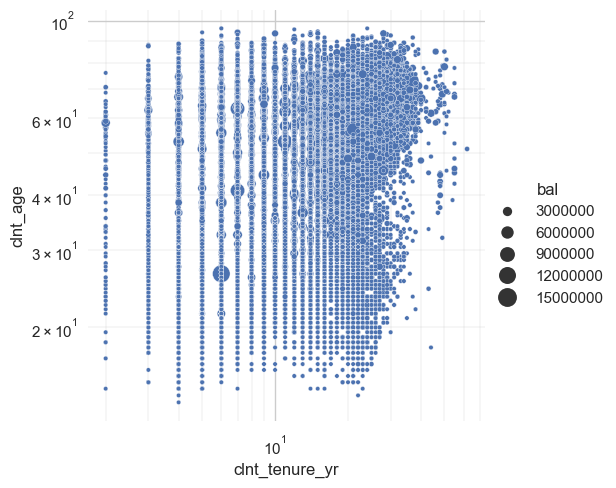

In [78]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_demo,
    x="clnt_tenure_yr", y="clnt_age", size="bal",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [ ]:
demo_age_bal = pd.crosstab(['

### Topline conclusions

The average client is:
- 46.4 yrs old
- has been a client for 12 years (starting at avg age 34)
- gender unknown
- has 2 accounts
- has a balance of USD 147,445.2
- has 3 calls every six months
- logs on 11 times a year

